In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering as AggClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram


In [9]:
data=pd.read_csv("../data/nba_2016_2017_100.csv")

In [11]:
data.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'OFF_RATING', 'DEF_RATING', 'NET_RATING',
       'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT',
       'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PACE', 'PIE', 'FGM',
       'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'USG_PCT_RANK', 'PACE_RANK', 'PIE_RANK',
       'FGM_RANK', 'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK',
       'CFID', 'CFPARAMS', 'WIKIPEDIA_HANDLE', 'TWITTER_HANDLE',
       'SALARY_MILLIONS', 'PTS', 'ACTIVE_TWITTER_LAST_YEAR',
       'TWITTER_FOLLOWER_COUNT_MILLIONS'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PLAYER_ID                        100 non-null    int64  
 1   PLAYER_NAME                      100 non-null    object 
 2   TEAM_ID                          100 non-null    int64  
 3   TEAM_ABBREVIATION                100 non-null    object 
 4   AGE                              100 non-null    int64  
 5   GP                               100 non-null    int64  
 6   W                                100 non-null    int64  
 7   L                                100 non-null    int64  
 8   W_PCT                            100 non-null    float64
 9   MIN                              100 non-null    float64
 10  OFF_RATING                       100 non-null    float64
 11  DEF_RATING                       100 non-null    float64
 12  NET_RATING             

In [13]:
data.head()


PLAYER_ID        PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  AGE  GP   W  \
0     201566  Russell Westbrook  1610612760               OKC   28  81  46   
1    1626246   Boban Marjanovic  1610612765               DET   28  35  16   
2    1627743  Demetrius Jackson  1610612738               BOS   22   5   1   
3     203076      Anthony Davis  1610612740               NOP   24  75  31   
4     201935       James Harden  1610612745               HOU   27  81  54   

    L  W_PCT   MIN  ...  FGA_PG_RANK  FG_PCT_RANK  CFID  \
0  35  0.568  34.6  ...            1          293     5   
1  19  0.457   8.4  ...          356           47     5   
2   4  0.200   3.4  ...          480            3     5   
3  44  0.413  36.1  ...            3           95     5   
4  27  0.667  36.4  ...            9          253     5   

                 CFPARAMS            WIKIPEDIA_HANDLE  TWITTER_HANDLE  \
0   2,015,661,610,612,760           Russell_Westbrook      russwest44   
1  16,262,461,610,612,700            Boban_Marjanovi_               0   
2  16,277,431,610,612,700           Demetrius_Jackson         d_jay11   
3   2,030,761,610,612,740  Anthony_Davis_(basketball)      antdavis23   
4   2,019,351,610,612,740                James_Harden       jharden13   

   SALARY_MILLIONS   PTS  ACTIVE_TWITTER_LAST_YEAR  \
0            26.54  31.6                         1   
1             7.00   5.5                         0   
2             1.45   2.0                         1   
3            22.12  28.0                         1   
4            26.50  29.1                         1   

   TWITTER_FOLLOWER_COUNT_MILLIONS  
0                            4.500  
1                            0.000  
2                            0.049  
3                            1.220  
4                            4.470  

[5 rows x 63 columns]

In [14]:
data.shape

(100, 63)

In [15]:
data.describe()

PLAYER_ID       TEAM_ID         AGE          GP           W  \
count  1.000000e+02  1.000000e+02  100.000000  100.000000  100.000000   
mean   3.026027e+05  1.610613e+09   27.510000   62.440000   33.020000   
std    4.237828e+05  8.788445e+00    3.935066   21.261869   15.421342   
min    1.717000e+03  1.610613e+09   20.000000    2.000000    0.000000   
25%    2.011780e+05  1.610613e+09   25.000000   55.500000   22.750000   
50%    2.023305e+05  1.610613e+09   27.000000   72.000000   35.000000   
75%    2.034582e+05  1.610613e+09   30.000000   77.000000   43.250000   
max    1.627848e+06  1.610613e+09   39.000000   82.000000   65.000000   

                L       W_PCT         MIN  OFF_RATING  DEF_RATING  ...  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
mean    29.420000    0.507010   26.391000  107.728000  105.946000  ...   
std     12.726478    0.159991    9.221222    5.157324    4.165889  ...   
min      1.000000    0.000000    3.300000   86.800000   93.000000  ...   
25%     21.000000    0.416000   19.450000  104.275000  103.625000  ...   
50%     30.500000    0.506500   29.700000  107.150000  106.000000  ...   
75%     37.250000    0.626250   33.900000  110.275000  108.525000  ...   
max     55.000000    0.824000   37.800000  124.200000  118.300000  ...   

         FGM_RANK    FGA_RANK  FGM_PG_RANK  FGA_PG_RANK  FG_PCT_RANK   CFID  \
count  100.000000  100.000000   100.000000   100.000000   100.000000  100.0   
mean   126.700000  138.350000   110.350000   128.700000   133.120000    5.0   
std    129.960639  136.383919   112.122171   129.410591    94.382553    0.0   
min      1.000000    1.000000     1.000000     1.000000     1.000000    5.0   
25%     28.750000   28.750000    28.750000    28.750000    47.000000    5.0   
50%     70.000000   82.000000    68.000000    70.500000   132.000000    5.0   
75%    185.500000  217.250000   163.000000   188.500000   198.500000    5.0   
max    474.000000  484.000000   465.000000   483.000000   355.000000    5.0   

       SALARY_MILLIONS         PTS  ACTIVE_TWITTER_LAST_YEAR  \
count       100.000000  100.000000                100.000000   
mean         11.290120   15.174200                  0.930000   
std           8.789342    7.319374                  0.256432   
min           0.310000    1.500000                  0.000000   
25%           2.842500    9.225000                  1.000000   
50%          10.820000   14.550000                  1.000000   
75%          18.400000   20.650000                  1.000000   
max          30.960000   31.600000                  1.000000   

       TWITTER_FOLLOWER_COUNT_MILLIONS  
count                       100.000000  
mean                          1.516579  
std                           4.345148  
min                           0.000000  
25%                           0.048000  
50%                           0.244000  
75%                           0.857750  
max                          37.000000  

[8 rows x 58 columns]

In [16]:
#Data Cleaning

In [17]:
data.isnull().sum()

PLAYER_ID                          0
PLAYER_NAME                        0
TEAM_ID                            0
TEAM_ABBREVIATION                  0
AGE                                0
                                  ..
TWITTER_HANDLE                     0
SALARY_MILLIONS                    0
PTS                                0
ACTIVE_TWITTER_LAST_YEAR           0
TWITTER_FOLLOWER_COUNT_MILLIONS    0
Length: 63, dtype: int64

In [ ]:
data.columns

In [20]:
data=data.drop(columns=["PLAYER_ID", "TEAM_ID", "TEAM_ABBREVIATION", "CFID", "CFPARAMS", "WIKIPEDIA_HANDLE", "TWITTER_HANDLE", "ACTIVE_TWITTER_LAST_YEAR"])

In [19]:
data.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'OFF_RATING', 'DEF_RATING', 'NET_RATING',
       'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT',
       'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PACE', 'PIE', 'FGM',
       'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'USG_PCT_RANK', 'PACE_RANK', 'PIE_RANK',
       'FGM_RANK', 'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK',
       'CFID', 'CFPARAMS', 'WIKIPEDIA_HANDLE', 'TWITTER_HANDLE',
       'SALARY_MILLIONS', 'PTS', 'ACTIVE_TWITTER_LAST_YEAR',
       'TWITTER_FOLLOWER_COUNT_MILLIONS'],
      dtype='object')

In [21]:
len(data.columns)

55

In [22]:
#EDA

In [23]:
#heatmapo

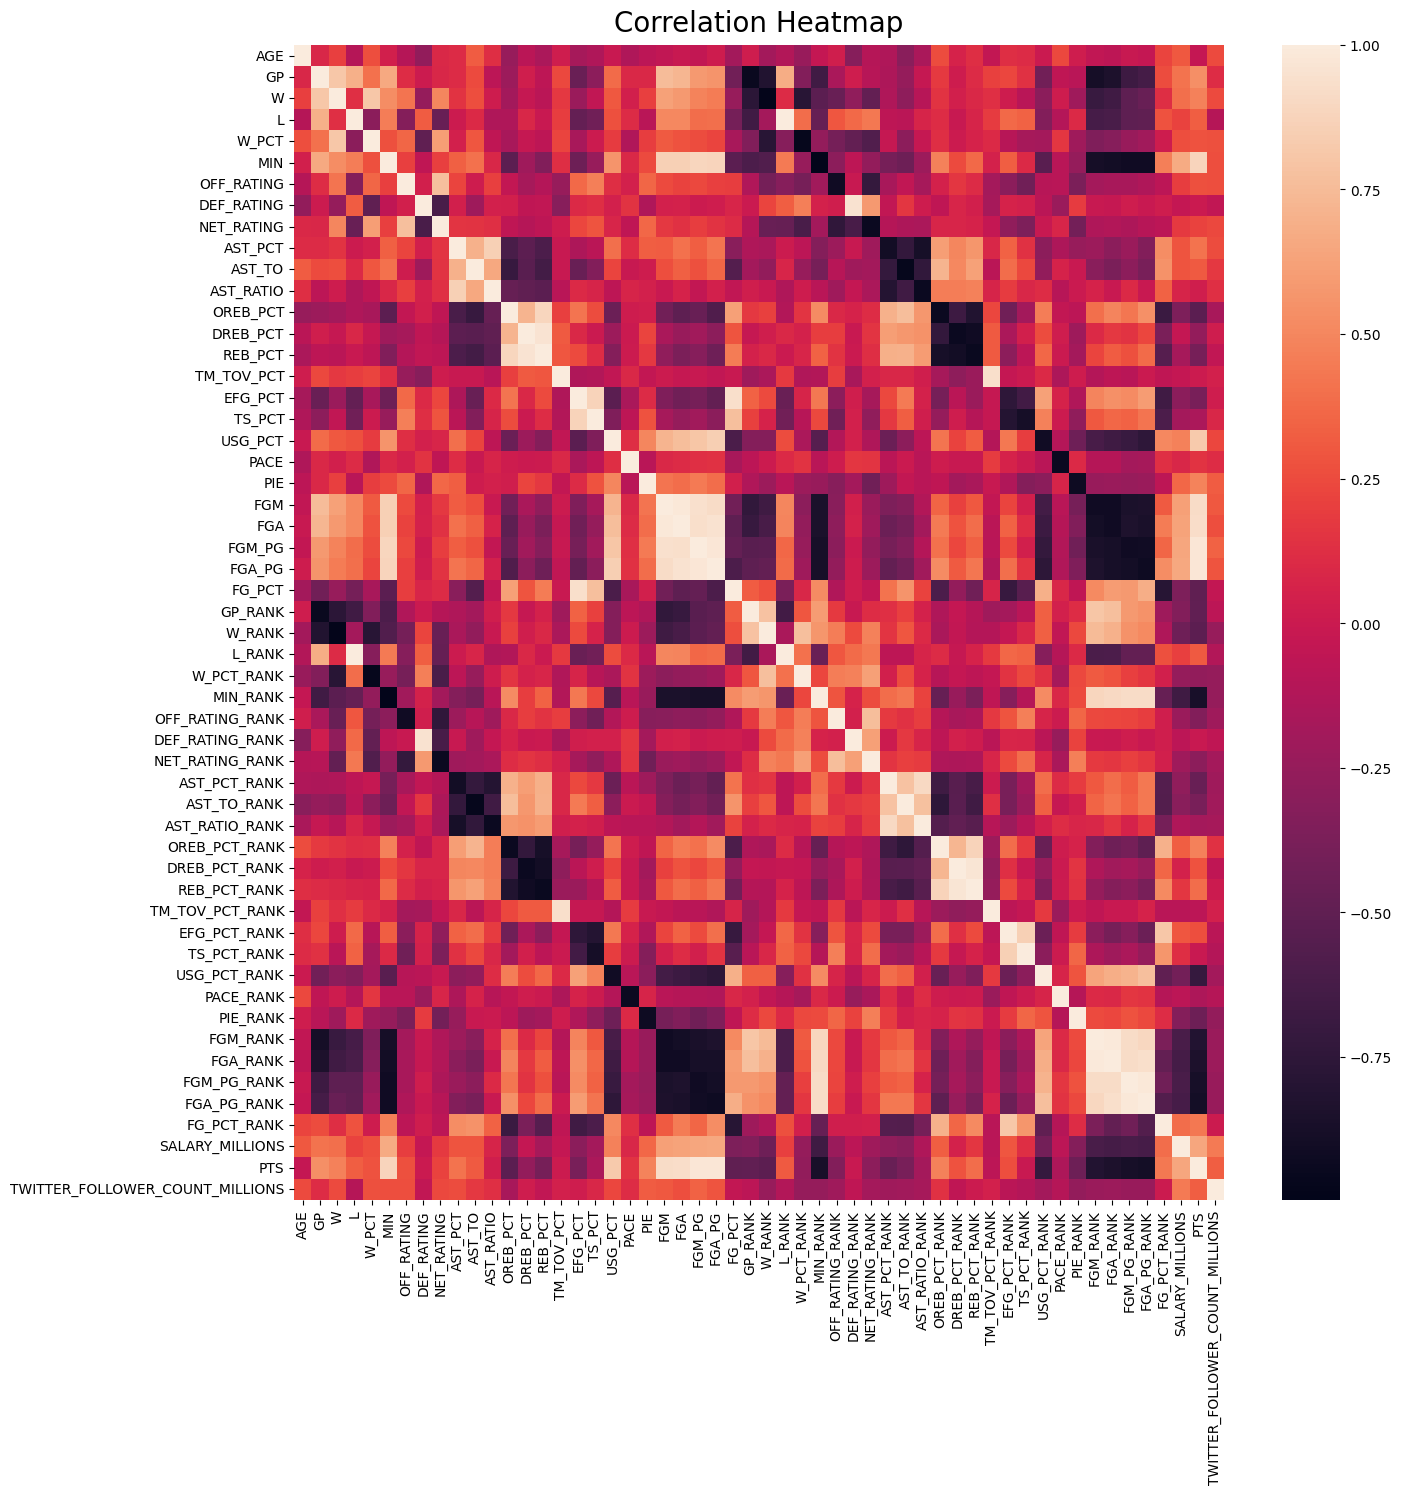

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(data.drop(columns=["PLAYER_NAME"]).corr())
plt.title("Correlation Heatmap", fontsize=20, pad=10)
plt.show()

In [27]:
feature_set=["AGE", "W","W_PCT", "MIN","NET_RATING", "TS_PCT", "USG_PCT","PIE","EFG_PCT","OREB_PCT","DREB_PCT", "OFF_RATING", "DEF_RATING", "AST_PCT", "REB_PCT", "TS_PCT", "FGM", "SALARY_MILLIONS", "PTS"]
len(feature_set)

19

In [35]:
data_dict = {
    "PLAYER_NAME":
    "Player's name.",

    "AGE":
    "Player age.",

    "GP":
    "Games played.",

    "W":
    "Games played where the team won.",

    "L":
    "Games played where the team lost.",

    "W_PCT":
    "Percentage of games played won.",

    "MIN":
    "Minutes played.",

    "OFF_RATING":
    "Player offensive rating",

    "DEF_RATING":
    "Player defensive rating",

    "NET_RATING":
    "Average of the offensive/defensive rating.",

    "AST_PCT":
    "Assist percentage.",

    "AST_TO":
    "Assists-to-turnovers.",

    "AST_RATIO":
    "Assists-to-turnovers ratio.",

    "OREB_PCT":
    "Offensive rebounds.",

    "DREB_PCT":
    "Defensive rebounds.",

    "REB_PCT":
    "Total rebounds.",

    "TM_TOV_PCT":
    "Team turnover rate.",

    "EFG_PCT":
    "Effective field goal percentage.",

    "TS_PCT":
    "True Shooting Percentage.",

    "USG_PCT":
    "Usage percentage, an estimate of how often a player makes team plays.",

    "PACE":
    "Pace factor, an estimate of the number of possessions.",

    "PIE":
    "Player impact factor, a statistic roughly measuring a player's impact on the games that they play that's used by `nba.com`.",

    "FGM":
    "Field goals made.",

    "FGA":
    "Field goals attempted.",

    "FGM_PG":
    "Field goals made percentage.",

    "FGA_PG":
    "Field goals attempted percentage.",

    "FG_PCT":
    "Field goals total percentage.",

    "GP_RANK":
    "Games played, league rank.",

    "W_RANK":
    "Wins, league rank.",

    "L_RANK":
    "Losses, league rank.",

    "W_PCT_RANK":
    "Win percentage, league rank.",

    "MIN_RANK":
    "Minutes played, league rank.",

    "OFF_RATING_RANK":
    "Offensive rating, league rank.",

    "DEF_RATING_RANK":
    "Defensive rating, league rank.",

    "NET_RATING_RANK":
    "Net rating, league rank.",

    "AST_PCT_RANK":
    "Assists percentage, league rank.",

    "AST_TO_RANK":
    "Assists-to-turnovers, league rank.",

    "AST_RATIO_RANK":
    "Assist ratio, league rank.",

    "OREB_PCT_RANK":
    "Offensive rebounds percentage, league rank.",

    "DREB_PCT_RANK":
    "Defensive rebounds percentage, league rank.",

    "REB_PCT_RANK":
    "Rebounds percentage, league rank.",

    "TM_TOV_PCT_RANK":
    "Team turnover, league rank.",

    "EFG_PCT_RANK":
    "Effective field goal percentage, league rank.",

    "TS_PCT_RANK":
    "True shooting percentage, league rank.",

    "USG_PCT_RANK":
    "Usage percentage, league rank.",

    "PACE_RANK":
    "Pace score, league rank.",

    "PIE_RANK":
    "Player impact, league rank.",

    "FGM_RANK":
    "Field goals made, league rank.",

    "FGA_RANK":
    "Field goals attempted, league rank.",

    "FGM_PG_RANK":
    "Field goals made percentage, league rank.",

    "FGA_PG_RANK":
    "Field goal attempted percentage, league rank.",

    "FG_PCT_RANK":
    "Field goal percentage, league rank.",

    "SALARY_MILLIONS":
    "Salary.",

    "PTS":
    "Points scored.",

    "TWITTER_FOLLOWER_COUNT_MILLIONS":
    "Number of Twitter followers.",
}

C:\Users\prxsh\AppData\Local\Temp\ipykernel_12880\3422552190.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs.show()


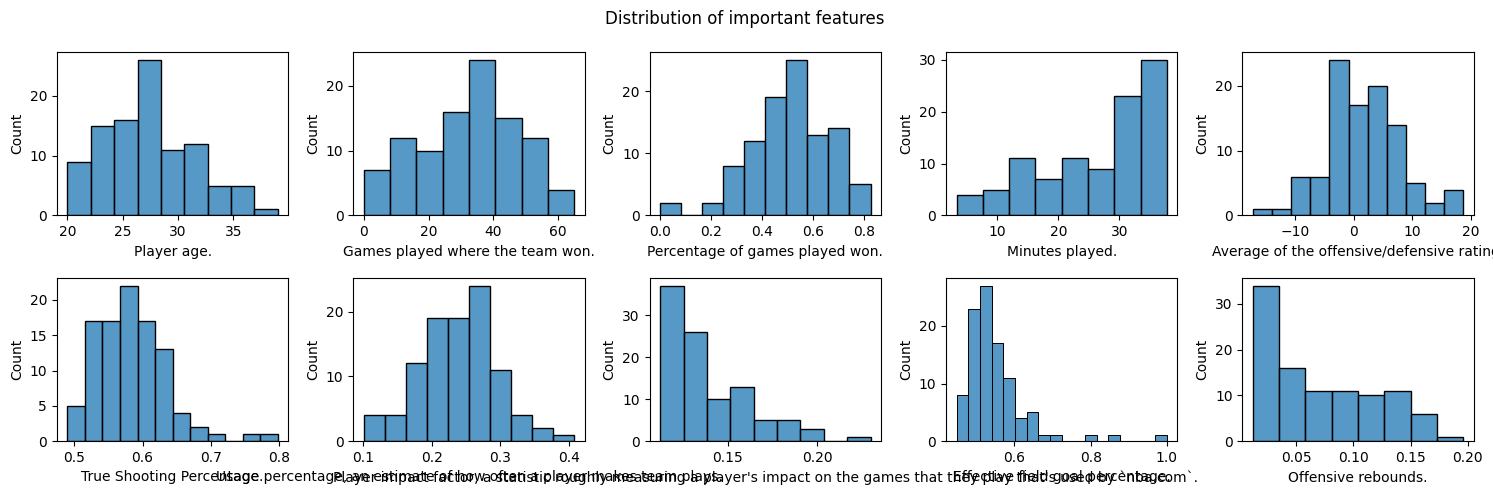

In [37]:
nrows=2
ncols=5
figs, axs=plt.subplots(nrows, ncols, figsize=(15, 5))

for i in range (nrows):
    for j in range(ncols):
        feature= feature_set[i*ncols+j]
        chart=sns.histplot(data, x=feature, ax=axs[i][j])
        chart.set_xlabel(data_dict[feature])
        
figs.suptitle("Distribution of important features")
figs.tight_layout()
figs.show()

MIN                                0.666452
MIN_RANK                           0.665692
FGA_PG                             0.656110
PTS                                0.647343
FGM_PG                             0.642189
FGA_RANK                           0.634905
FGA                                0.630598
FGA_PG_RANK                        0.625703
FGM                                0.614579
FGM_PG_RANK                        0.612474
FGM_RANK                           0.607955
USG_PCT                            0.471883
TWITTER_FOLLOWER_COUNT_MILLIONS    0.443932
W_RANK                             0.428307
Name: SALARY_MILLIONS, dtype: float64


C:\Users\prxsh\AppData\Local\Temp\ipykernel_12880\3549623182.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')


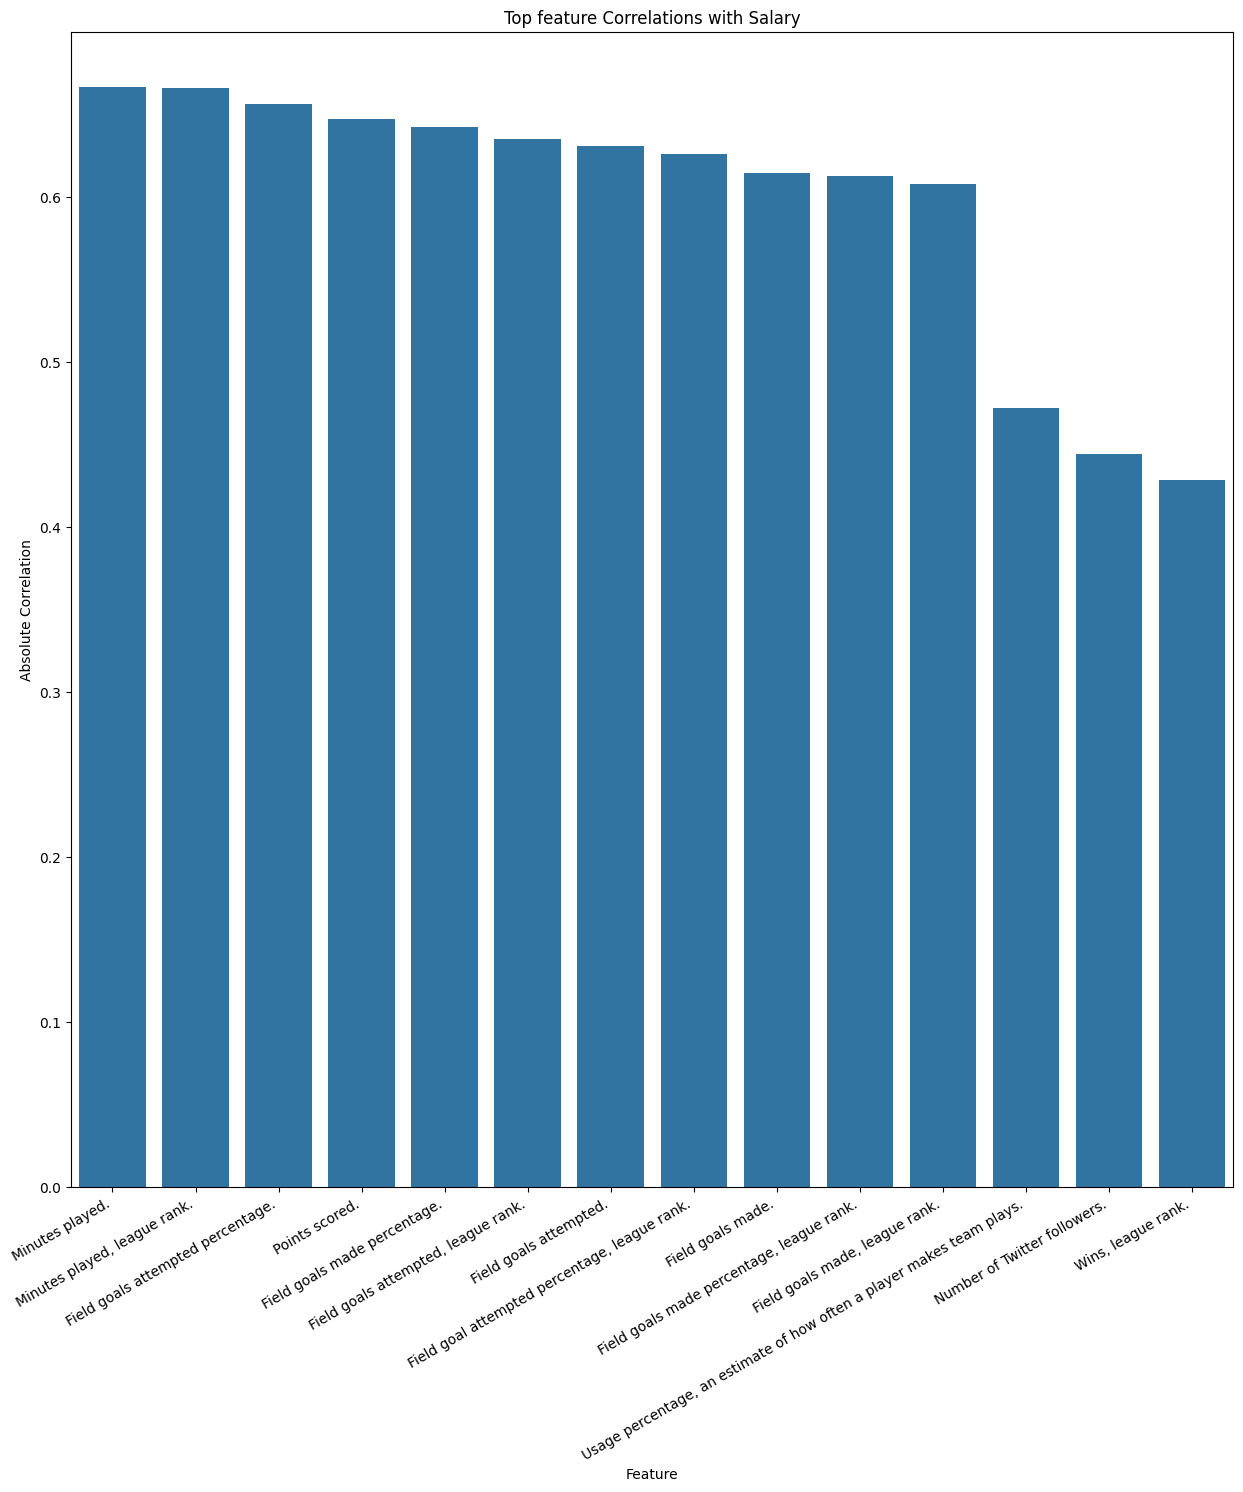

In [45]:
#Relations with Salary
salary_correlations=data.drop(columns=["PLAYER_NAME"]).corr()["SALARY_MILLIONS"].sort_values(key=abs, ascending=False).map(abs)[1:15]
#print(salary_correlations)
salary_correlations.index=salary_correlations.index.map(lambda x:data_dict[x])
plt.figure(figsize=(15, 15))
chart=sns.barplot(x=salary_correlations.index, y=salary_correlations.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
chart.set_xlabel("Feature")
chart.set_ylabel("Absolute Correlation")
chart.set_title("Top feature Correlations with Salary")
plt.show()

In [48]:
#PCA
data_i=data.drop(columns=["PLAYER_NAME"])
data_i.shape

(100, 54)

In [77]:
data.shape

(100, 55)

In [61]:
def plot_pca_with_color_col(col, show_name=False):
    pca=PCA(3)
    data_pca=pca.fit_transform(data_i)
    data_pca=pd.DataFrame(data_pca, columns=["comp1", "comp2", "comp3" ])
    data_pca[col] = data[col]
    data_pca["player_name"] = data["PLAYER_NAME"]
    fig=px.scatter_3d(data_pca, x="comp1", y="comp2",z="comp3", color=col, hover_name="player_name", text="player_name" if show_name else None, title=f"Visualisation of Players: {data_dict[col]}")
    fig.show()

In [62]:
plot_pca_with_color_col("PTS")


In [63]:
plot_pca_with_color_col("OFF_RATING")

In [64]:
plot_pca_with_color_col("DEF_RATING")

In [65]:
plot_pca_with_color_col("SALARY_MILLIONS")

In [69]:
#uisng elbow method to determine the perfect number of clusters for a better approach
inertias = []
for n in range (2, 15):
    kmeans= KMeans(n_clusters=n)
    kmeans.fit(data_i)
    inertias.append(kmeans.inertia_)

C:\Users\prxsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\prxsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\prxsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\prxsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

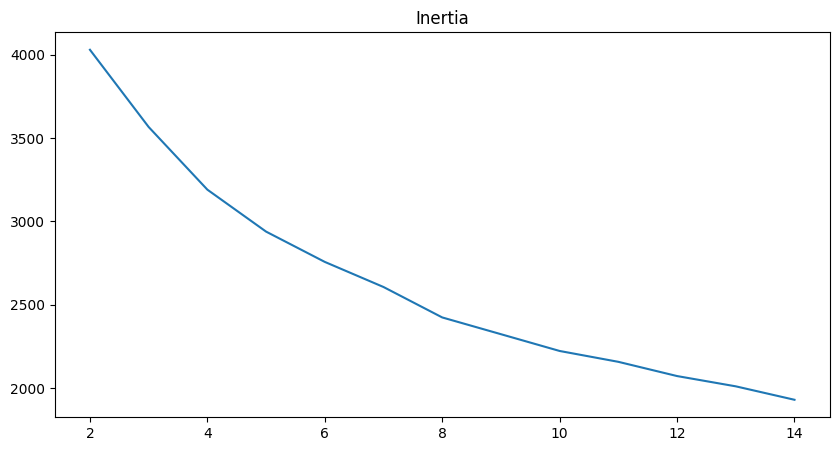

In [73]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(2, 15), y=inertias)
plt.title("Elbow Method")
plt.title("Number of Clusters")
plt.title("Inertia")
plt.show()

In [78]:
#considering the elbow at 4...
#3d
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_i)
pca = PCA(3)
data_pca = pca.fit_transform(data_i)
data_pca = pd.DataFrame(data_pca, columns=["comp1", "comp2", "comp3"])
data_pca["cluster"] = kmeans.predict(data_i)
data_pca["player_name"] = data["PLAYER_NAME"]
data_pca["points"] = data["PTS"]
print(data_pca)
px.scatter_3d(data_pca, x="comp1", y="comp2", z="comp3", color="cluster", hover_name="player_name", hover_data=["points"], title="K-Means 4 Clusters (3D)")

       comp1     comp2     comp3  cluster        player_name  points
0  -7.069009  2.009259 -1.258430        2  Russell Westbrook    31.6
1   6.846731  1.767055 -0.337306        0   Boban Marjanovic     5.5
2   9.112534 -0.263318  7.158875        0  Demetrius Jackson     2.0
3  -3.179448  2.501483 -3.835327        2      Anthony Davis    28.0
4  -6.129848  2.674068  1.074605        2       James Harden    29.1
..       ...       ...       ...      ...                ...     ...
95  6.750093 -2.227958 -3.748114        3    Thomas Robinson     5.0
96 -1.741264 -1.109587 -1.971300        1      Tobias Harris    16.0
97  0.382067 -3.412529 -4.269550        1      Julius Randle    13.2
98  7.195860 -3.322922 -2.663814        0      Cheick Diallo     5.1
99 -2.376582 -1.887690 -2.958821        1    Harrison Barnes    19.2

[100 rows x 6 columns]


C:\Users\prxsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [75]:
#2d
pca = PCA(2)
data_pca = pca.fit_transform(data_i)
data_pca = pd.DataFrame(data_pca, columns=["comp1", "comp2"])
data_pca["cluster"] = kmeans.predict(data_i)
data_pca["player_name"] = data["PLAYER_NAME"]
data_pca["points"] = data["PTS"]
px.scatter(data_pca, x="comp1", y="comp2", color="cluster", hover_name="player_name", hover_data=["points"], text="player_name", title="K-Means 4 Clusters (2D)")

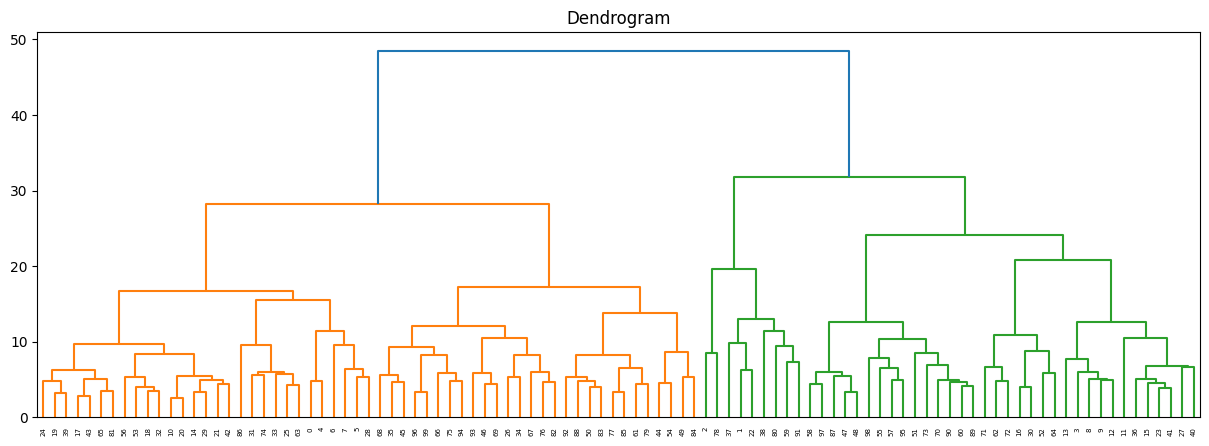

In [79]:
#Dendrogram
Z=linkage(data_i, method="ward")
plt.figure(figsize=(15,5))
dendrogram(Z)
plt.title("Dendrogram")
plt.show()